In [1]:
import numpy as np
import pandas as pd
import sympy as S
from scipy import stats

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
mpl.style.use('seaborn-darkgrid')
mpl.rcParams.update({'font.size': 18})

In [3]:
pd.options.display.max_rows = 10

# Introduction to Statistics

To get started thinking about statistics, consider the three famous problems

* Suppose you have a bag filled with colored marbles. You close your eyes and
  reach into it and pull out a handful of marbles, what can you say about what is
  in the bag?

* You arrive in a strange town and you need a taxicab. You look out the window,
  and in the dark, you can just barely make out the number on the roof of one of
  the cabs. In this town, you know they label the cabs sequentially. How many
  cabs does the town have?

* You have already taken the entrance exam twice and you want to know if it's
  worth it to take it a third time in the hopes that your score will improve.
  Because only the last score is reported, you are worried that you may do worse
  the third time. How do you decide whether or not to take the test again?

Statistics provides a structured way to approach each of these problems.  This
is important because it is easy to be fooled by your biases and intuitions.
Unfortunately, the field does not provide a *single* way to do this, which
explains the many library shelves that groan under the weight of statistics
texts. This means that although many statistical quantities are easy to
*compute*, these are not so easy to justify, explain, or even understand.
Fundamentally, when we start with just the data, we lack the underlying
probability density that we discussed in the last chapter. This removes key
structures that we have to compensate for in however we choose to process the
data.  In the following, we consider some of the most powerful statistical
tools in the Python arsenal and suggest ways to think through them

## Scipy Statistics Module

Although there are some basic statistical functions in Numpy (e.g., mean, std,
median), the real repository for statistical functions is in scipy.stats. There
are over eighty continuous probability distributions implemented in scipy.stats
and an additional set of more than ten discrete distributions, along with many other
supplementary statistical functions that we will select from in what follows.

To get started with scipy.stats, you have to load the module and create an
object that has the distribution you’re interested in. For example,

In [4]:
n = stats.norm(0,10) # create normal distrib

The n variable is an object that represents a normally distributed random variable
with mean zero and standard deviation, σ = 10. Note that the more general term
for these two parameters is location and scale, respectively. Now that we have this
defined, we can compute mean, as in the following:

In [ ]:
n.

In [5]:
n.mean() # we already know this from its definition!

0.0

We can also compute higher order moments as

In [6]:
n.moment(4)

30000.0

The main public methods for continuous random variables are

- rvs: random variates
- pdf: probability density function
- cdf: cumulative distribution function
- sf: survival Function (1-CDF)
- ppf: percent point function (Inverse of CDF)
- isf: inverse survival function (Inverse of SF)
- stats: mean, variance, (Fisher’s) skew, or (Fisher’s) kurtosis
- moment: non-central moments of the distribution


For example, we can compute the value of the pdf at a specific point.

In [13]:
n.pdf(0)

0.03989422804014327

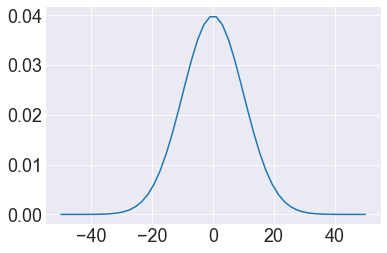

In [12]:
x = np.linspace(-50,50)
plt.plot(x,n.pdf(x))

or, the cdf for the same random variable.

In [12]:
n.cdf(0)

0.5

You can also create samples from this distribution as in the following:

In [15]:
n.rvs((10,4))

array([[ -3.95261776,  -1.10235526,   3.65299855,  18.90545718],
       [ -1.75221604,   7.45284115,   0.85167592,  -9.62534968],
       [  2.48382228,  -5.43822003,  -7.39602942,  19.09146232],
       [  1.06634806,  -1.75774284,   8.61021872,   8.74551099],
       [-12.43505293,   6.8722731 ,   3.03213048,  -5.65200055],
       [  1.67841725,   5.30479245,  15.87175852,   5.83434822],
       [-27.62236035, -15.15371522,  15.53213675, -15.16706312],
       [ -8.22149945,   9.98281512, -10.31837653,  -8.44694756],
       [ -8.52860451,   3.46954281,  -6.2516219 ,  12.49231549],
       [  4.43994033,  16.76152295,   0.91431173,   1.49222333]])

Many common statistical tests are already built-in. For example, Shapiro-Wilk tests
the null hypothesis that the data were drawn from a normal distribution, 1 as in the
following:

In [17]:
stats.shapiro(n.rvs(100))

(0.995429515838623, 0.9846886396408081)

## Sympy Statistics Module

Sympy has its own much smaller, but still extremely useful statistics module that
enables symbolic manipulation of statistical quantities. For example,

In [18]:
from sympy import stats as Sstats
from sympy.abc import x

In [19]:
X = Sstats.Normal('x',0,10) # create normal random variable

We can obtain the probability density function as,

In [20]:
Sstats.density(X)(x)

sqrt(2)*exp(-x**2/200)/(20*sqrt(pi))

and we can evaluate the cumulative density function as the following,

In [13]:
Sstats.cdf(X)(0)

1/2

There is also a corresponding expectation function, stats.E you can use to compute complicated expectations using all of Sympy’s
powerful built-in integration machinery. For example we can compute,

In [15]:
Sstats.E(abs(X)**(1/2))

3.25856431038421*sqrt(2)/sqrt(pi)

In [14]:
Sstats.E(abs(X)**(1/2)).evalf()

2.59995815363879

Unfortunately, there is very limited support for multivariate distributions at the time
of this writing.

## Types of Convergence

The absence of the probability density for the raw data means that we have to
argue about sequences of random variables in a structured way. From basic
calculus, recall the following convergence notation,

$$
x_n \rightarrow x_o
$$

 for the real number sequence $x_n$. This means that for any given
$\epsilon>0$, no matter how small, we can exhibit a $m$ such that for
any $n>m$, we have

$$
\vert x_n-x_o \vert < \epsilon
$$

 Intuitively, this means that once we get past $m$ in the sequence, we
get as to within $\epsilon$ of $x_o$. This means that nothing surprising
happens in the sequence on the long march to infinity, which gives a sense of
uniformity to the convergence process.  When we argue about convergence for
statistics, we want to same look-and-feel as we have here, but because we are
now talking about random variables, we need other concepts.  There are two
moving parts for random variables. Recall that random variables are really
functions that map sets into the real line: $X:\Omega \mapsto \mathbb{R}$.
Thus, one part to keep track of is the behavior of the subsets of $\Omega$
while arguing about convergence.   The other part is the sequence of values
that the random variable takes on the real line and how those behave in the
convergence process.

## Almost Sure Convergence

The most straightforward extension into statistics of this convergence concept
is *convergence with probability one*, which is also known as *almost sure
convergence*, which is the following,


$$
P\lbrace \texttt{for each } \epsilon>0 \texttt{ there is } n_\epsilon>0 \texttt{ such that for all } n>n_\epsilon, \: \vert X_n-X \vert < \epsilon   \rbrace = 1
$$


 Note the similarity to the prior notion of convergence for real
numbers.  When this happens, we write this as $X_n \overset{as}{\to} X$.  In
this context, almost sure convergence means that if we take any particular
$\omega\in\Omega$ and then look at the sequence of real numbers that are
produced by each of the random variables,

$$
(X_1(\omega),X_2(\omega),X_3(\omega),\ldots,X_n(\omega))
$$

 then this sequence is just a real-valued sequence in the
sense of our convergence on the real line and converges in the same way. If we
collect all of the $\omega$ for which this is true and the measure of that
collection equals one, then we have almost sure convergence of the random
variable. Notice how the convergence idea applies to both sides of the random
variable: the (domain) $\Omega$ side and the (co-domain) real-valued side. 

An equivalent and more compact way of writing this is the following,

$$
P\left(\omega\in\Omega \colon\lim_{n\rightarrow\infty} X_n(\omega)=X(\omega) \right)=1
$$

**Example.** To get some feel for the mechanics of this kind of convergence
consider the following sequence of uniformly distributed random variables on
the unit interval, $X_n \sim \mathcal{U}[0,1]$. Now, consider taking
the maximum of the set of $n$ such variables as the following,

$$
X_{(n)} = \max \lbrace X_1,\ldots,X_n \rbrace
$$

 In other words, we scan through a list of $n$ uniformly distributed
random variables and pick out the maximum over the set. Intuitively, we should
expect that $X_{(n)}$ should somehow converge to one. Let's see if we can make
this happen almost surely.  We want to exhibit $m$ so that the following is
true,

$$
P(\vert 1 - X_{(n)} \vert < \epsilon) \texttt{ when } n>m
$$

 Because $X_{(n)}<1$, we can simplify this as the following,

$$
1-P(X_{(n)}<1-\epsilon)=1-(1-\epsilon)^m \underset{m\rightarrow\infty}{\longrightarrow} 1
$$

 Thus, this sequence converges almost surely. We can work this
example out in Python using Scipy to make it concrete with the following
code,

In [23]:
u = stats.uniform()
xn = lambda i: u.rvs(i).max()
xn(5)

0.7522894532756095

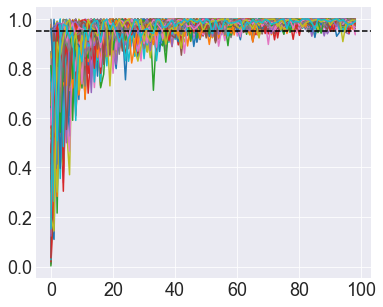

In [29]:
f, ax = plt.subplots(figsize=(6,5))
for _ in range(100):
    ax.plot([xn(n) for n in range(1,100)]);

ax.axhline(y=0.95, color='k', linestyle='--')

 Thus, the `xn` variable is the same as the $X_{(n)}$ random variable
in our example. [Figure](#fig:Convergence_001) shows a plot of these random
variables for different values of $n$ and multiple realizations of each random
variable (multiple gray lines). The dark horizontal line is at the `0.95`
level. For this example, suppose we are interested in the convergence of the
random variable to within `0.05` of one so we are interested in the region
between one and `0.95`.  Thus, in our Equation

$$
P(\vert 1 - X_{(n)} \vert < \epsilon) \texttt{ when } n>m\,,
$$
$\epsilon=0.05$.


Now, we have to find $n_\epsilon$ to get the almost sure convergence. From
[Figure](#fig:Convergence_001), as soon as we get past $n>60$, we can see that
all the realizations start to fit in the region above the `0.95` horizontal
line.  However, there are still some cases where a particular realization will
skip below this line. 

To get the probability  guarantee of the definition
satisfied, we have to make sure that for whatever $n_\epsilon$ we settle on,
the probability of this kind of noncompliant behavior should be extremely
small, say, less than 1%.  Now, we can compute the following to estimate this
probability for $n=60$ over 1000 realizations,

In [32]:
xn(60) > 0.95

True

In [33]:
np.mean([xn(60) > 0.95 for i in range(1000)])

0.954

 So, the probability of having a noncompliant case beyond $n>60$ is
pretty good, but not still what we are after (`0.99`). We can solve for the $m$
in our analytic proof of convergence by plugging in our factors for $\epsilon$
and our desired probability constraint,

In [25]:
np.log(1-.99)/np.log(.95)

89.78113496070968

 Now, rounding this up and re-visiting the same estimate as above,

In [37]:
np.mean([xn(90) > 0.95 for i in range(1000)])

0.993

 which is the result we were looking for. The important thing to
understand from this example is that we had to choose convergence criteria for
*both* the values of the random variable (`0.95`) and for the probability of
achieving that level (`0.99`) in order to compute the $m$.  Informally
speaking, almost sure convergence means that not only will any particular $X_n$
be close to $X$ for large $n$, but whole sequence of values will remain close
to $X$ with high probability. 

<!-- dom:FIGURE: [fig-statistics/Convergence_001.png, width=500 frac=0.85] Almost sure convergence example for multiple realizations of the limiting sequence.   <div id="fig:Convergence_001"></div> -->
<!-- begin figure -->
<div id="fig:Convergence_001"></div>

<p>Almost sure convergence example for multiple realizations of the limiting sequence.</p>
<img src="fig-statistics/Convergence_001.png" width=500>

<!-- end figure -->


## Convergence in Probability

A weaker kind of convergence is *convergence in probability* which means the
following:

$$
\mathbb{P}(\mid X_n -X\mid > \epsilon) \rightarrow 0
$$

 as $n \rightarrow \infty$ for each $\epsilon > 0$. 

This is notationally
shown as $X_n \overset{P}{\to} X$.  For example, let's consider the following
sequence of random variables where $X_n = 1/2^n$ with probability $p_n$ and
where $X_n=c$ with probability $1-p_n$. Then, we have $X_n  \overset{P}{\to} 0$
as $p_n \rightarrow 1$.  This is allowable under this notion of convergence
because a diminishing amount of *non-converging* behavior (namely, when
$X_n=c$) is possible. Note that we have said nothing about *how* $p_n
\rightarrow 1$.

**Example.** To get some sense of the mechanics of this kind of convergence,
let $\lbrace X_1,X_2,X_3,\ldots \rbrace$ be the indicators of the corresponding
intervals,

$$
(0,1],(0,\tfrac{1}{2}],(\tfrac{1}{2},1],(0,\tfrac{1}{3}],(\tfrac{1}{3},\tfrac{2}{3}],(\tfrac{2}{3},1]
$$

 In other words, just keep splitting the unit interval into equal
chunks and enumerate those chunks with $X_i$. Because each $X_i$ is an
indicator function, it takes only two values: zero and one.  For example,
for $X_2=1$ if $0<x \le 1/2$ and zero otherwise. Note that $x \sim
\mathcal{U}(0,1)$. This means that $P(X_2=1)=1/2$. Now, we want to compute
the sequence of $P(X_n>\epsilon)$ for each $n$ for some $\epsilon\in (0,1)$.
For $X_1$, we  have $P(X_1>\epsilon)=1$ because we already chose $\epsilon$
in the interval covered by $X_1$. For $X_2$, we have $P(X_2>\epsilon)=1/2$,
for $X_3$, we have $P(X_3>\epsilon)=1/3$, and so on.  This produces the
following sequence:
$(1,\frac{1}{2},\frac{1}{2},\frac{1}{3},\frac{1}{3},\ldots)$.  The limit
of the sequence is zero so that $X_n \overset{P}{\to} 0$. However, for
every $x\in (0,1)$, the sequence of  function values of $X_n(x)$ consists
of infinitely many zeros and ones (remember that indicator functions can
evaluate to either zero or one).  Thus, the set of $x$ for which the
sequence $X_n(x)$ converges is empty because the sequence bounces 
between zero and one. This means that almost sure
convergence fails here even though we have convergence in probability.
The key distinction is that convergence in probability considers the convergence
of a sequence of probabilities whereas almost sure convergence is
concerned about the sequence of values of the random variables over
sets of events that *fill out* the underlying probability space entirely (i.e.,
with probability one).

This is a good example so let's see if we can make it concrete with some
Python. The following is a function to compute the different subintervals,

In [38]:
n=1
list(zip(range(n+1),range(1,n+1)))

[(0, 1)]

In [39]:
n=2
list(zip(range(n+1),range(1,n+1)))

[(0, 1), (1, 2)]

In [43]:
n=5
np.asarray(list(zip(range(n+1),range(1,n+1))))/5

array([[0. , 0.2],
       [0.2, 0.4],
       [0.4, 0.6],
       [0.6, 0.8],
       [0.8, 1. ]])

In [44]:
def make_interval(n):
    return np.array(list(zip(range(n+1),range(1,n+1))))/n

In [47]:
make_interval(6)

array([[0.        , 0.16666667],
       [0.16666667, 0.33333333],
       [0.33333333, 0.5       ],
       [0.5       , 0.66666667],
       [0.66666667, 0.83333333],
       [0.83333333, 1.        ]])

 Now, we can use this function to create a Numpy
array of intervals, as in the example,

In [45]:
[make_interval(i) for i in range(1,5)]

[array([[0., 1.]]), array([[0. , 0.5],
        [0.5, 1. ]]), array([[0.        , 0.33333333],
        [0.33333333, 0.66666667],
        [0.66666667, 1.        ]]), array([[0.  , 0.25],
        [0.25, 0.5 ],
        [0.5 , 0.75],
        [0.75, 1.  ]])]

`np.vstack`: Stack arrays in sequence vertically (row wise).

In [46]:
intervals = np.vstack([make_interval(i) for i in range(1,5)])

In [47]:
intervals

array([[0.        , 1.        ],
       [0.        , 0.5       ],
       [0.5       , 1.        ],
       [0.        , 0.33333333],
       [0.33333333, 0.66666667],
       [0.66666667, 1.        ],
       [0.        , 0.25      ],
       [0.25      , 0.5       ],
       [0.5       , 0.75      ],
       [0.75      , 1.        ]])

 The following function computes the bit string in our example,
$\lbrace X_1,X_2,\ldots,X_n \rbrace$,

In [48]:
u = stats.uniform()

In [61]:
intervals[:,0]

array([0.        , 0.        , 0.5       , 0.        , 0.33333333,
       0.66666667, 0.        , 0.25      , 0.5       , 0.75      ])

In [62]:
intervals[:,1]

array([1.        , 0.5       , 1.        , 0.33333333, 0.66666667,
       1.        , 0.25      , 0.5       , 0.75      , 1.        ])

In [53]:
bits(0.1)

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0])

In [52]:
def bits(u):
    return ((intervals[:,0] < u) & (u<=intervals[:,1])).astype(int)

In [54]:
u.rvs()

0.067123900589391

In [59]:
bits(u.rvs())

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1])

 Now that we have the individual bit strings, to show convergence we
want to show that the probability of each entry goes to a limit. For example,
using ten realizations,

In [64]:
np.vstack([bits(u.rvs()) for i in range(10)])

array([[1, 1, 0, 1, 0, 0, 1, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 1, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 1, 0, 0],
       [1, 0, 1, 0, 0, 1, 0, 0, 1, 0],
       [1, 0, 1, 0, 0, 1, 0, 0, 0, 1],
       [1, 1, 0, 1, 0, 0, 0, 1, 0, 0],
       [1, 0, 1, 0, 0, 1, 0, 0, 0, 1],
       [1, 0, 1, 0, 0, 1, 0, 0, 0, 1],
       [1, 0, 1, 0, 0, 1, 0, 0, 0, 1]])

 We want the limiting probability of a one in each column to convert
to a limit. We can estimate this over 1000  realizations using the following
code,

In [60]:
np.vstack([bits(u.rvs()) for i in range(1000)]).mean(axis=0)

array([1.   , 0.525, 0.475, 0.361, 0.325, 0.314, 0.272, 0.253, 0.22 ,
       0.255])

In [61]:
intervals = np.vstack([make_interval(i) for i in range(1,10)])
probs = np.vstack([bits(u.rvs()) for i in range(1000)]).mean(axis=0)

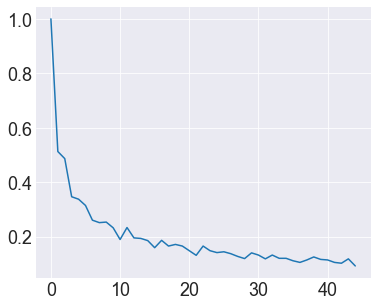

In [62]:
f, ax = plt.subplots(figsize=(6,5))
ax.plot(probs)

 Note that these entries should approach the
$(1,\frac{1}{2},\frac{1}{2},\frac{1}{3},\frac{1}{3},\ldots)$ sequence we found
earlier. [Figure](#fig:Convergence_002) shows the convergence of these
probabilities for a large number of intervals. Eventually, the probability
shown on this graph will decrease to zero with large enough $n$. Again, note
that the individual sequences of zeros and ones do not converge, but the
probabilities of these sequences converge. This is the key difference between
almost sure convergence and convergence in probability. Thus, convergence in
probability does *not* imply  almost sure convergence. Conversely, almost sure
convergence *does* imply convergence in probability.


<!-- dom:FIGURE: [fig-statistics/Convergence_002.png, width=500 frac=0.85] Convergence in probability for the random variable sequence.  <div id="fig:Convergence_002"></div> -->
<!-- begin figure -->
<div id="fig:Convergence_002"></div>

<p>Convergence in probability for the random variable sequence.</p>
<img src="fig-statistics/Convergence_002.png" width=500>

<!-- end figure -->


The following notation should help emphasize the difference
between almost sure convergence and convergence in probability, 
respectively,

$$
\begin{align*}
P\left(\lim_{n\rightarrow \infty} \vert X_n-X\vert < \epsilon\right)&=1~~~\texttt{(almost sure convergence)}  \\\
\lim_{n\rightarrow \infty}  P(\vert X_n-X\vert < \epsilon)&=1~~~\texttt{(convergence in probability)}
\end{align*}
$$

## Convergence in Distribution

<!-- DasGupta -->
<!-- p. 225 in Boos -->
<!-- p.133 Keener, Delta Method -->
<!-- p. 352 MMA Rose -->
<!-- p. 314, Kobayashi -->
<!-- p. 291 Oloffson -->

So far, we have been discussing convergence in terms of
sequences of probabilities or sequences of values taken by
the random variable.  By contrast,  the next major kind of
convergence is *convergence in distribution* where

$$
\lim_{n \to \infty}  F_n(t) = F(t)
$$

 for all $t$ for which $F$ is continuous and $F$ is the
cumulative density function. For this case, convergence is only
concerned with the cumulative density function, written as $X_n
\overset{d}{\to} X$.  

**Example.** To develop some intuition about this kind of convergence,
consider a sequence of $X_n$ Bernoulli random variables. Furthermore,
suppose these are all really just the same random variable $X$.
Trivially, $X_n \overset{d}{\to} X$. Now, suppose we define $Y=1-X$,
which means that $Y$ has the same distribution as $X$. Thus, $X_n
\overset{d}{\to} Y$. By contrast, because $\vert X_n - Y\vert=1$ for all
$n$, we can never have almost sure convergence or convergence in
probability. Thus, convergence in distribution is the weakest
of the three forms of convergence in the sense that it is implied by
the other two, but implies neither of the two.

As another striking example, we could have $Y_n \overset{d}{\to} Z$ where $Z
\sim \mathcal{N}(0,1)$, but we could also have $Y_n \overset{d}{\to} -Z$.
That is, $Y_n$ could converge in distribution to either $Z$ or $-Z$. This
may seem ambiguous, but this kind of convergence is practically very useful
because it allows for complicated distributions to be approximated by
simpler distributions.  

## Limit Theorems
<div id="ch:stats:sec:limit"></div>

Now that we have all of these notions of convergence, we can apply them to
different situations and see what kinds of claims we can construct from them.

**Weak Law of Large Numbers.**  Let $\lbrace X_1,X_2,\ldots,X_n \rbrace$ be an
iid set of random variables with finite mean $\mathbb{E}(X_k)=\mu$ and finite
variance. Let $\overline{X}_n = \frac{1}{n}\sum_k X_k$. Then, we have
$\overline{X}_n \overset{P}{\to} \mu$. This result is important because we
frequently estimate parameters using an averaging process of some kind. This
basically justifies this in terms of convergence in probability. Informally,
this means that the distribution of $\overline{X}_n$ becomes concentrated around $\mu$ as $n\rightarrow\infty$.

In [63]:
u = stats.uniform(loc=1,scale=2)

In [64]:
u.rvs()

1.4348223266743636

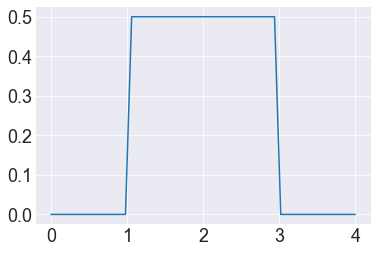

In [65]:
plt.plot(np.linspace(0,4),u.pdf(np.linspace(0,4)));

In [66]:
u.mean()

2.0

In [67]:
def mean_n(n, ensemble=1000):
    return np.asarray([np.mean(u.rvs(size=n)) for _ in range(ensemble)])

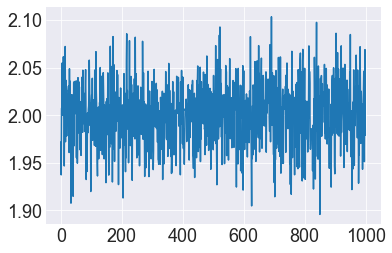

In [71]:
plt.plot(mean_n(300))

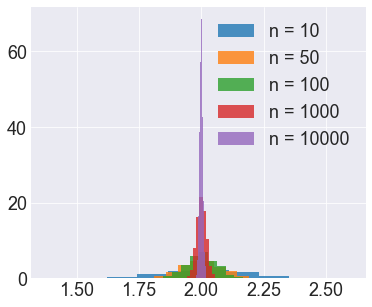

In [73]:
plt.figure(figsize=(6,5))
for n in [10, 50, 100, 1000, 10000]:
    plt.hist(mean_n(n), density=True, label=f"n = {n}", alpha=0.8);
plt.legend();

**Strong Law of Large Numbers.**  Let $\lbrace X_1,X_2,\ldots,\rbrace$ be an
iid set of random variables. Suppose that $\mu=\mathbb{E}\vert
X_i\vert<\infty$, then $\overline{X}_n \overset{as}{\to} \mu$. The reason this
is called the strong law is that it implies the weak law because almost sure
convergence implies convergence in probability. The so-called  Komogorov
criterion gives the convergence of the following,

$$
\sum_k \frac{\sigma_k^2}{k^2}
$$

 as a sufficient condition for concluding that the Strong Law applies
to the sequence $ \lbrace X_k \rbrace$ with corresponding $\lbrace \sigma_k^2
\rbrace$.

As an example, consider an infinite sequence of Bernoulli trials with $X_i=1$
if the $i^{th}$ trial is successful. Then $\overline{X}_n$ is the relative
frequency of successes in $n$ trials and $\mathbb{E}(X_i)$ is the
probability $p$ of success on the $i^{th}$ trial. With all that established,
the Weak Law says only that if we consider a sufficiently large and fixed
$n$, the probability that the relative frequency will converge to $p$ is
guaranteed. The Strong Law states that if we regard the observation of all
the infinite $\lbrace X_i \rbrace$ as one performance of the experiment, the
relative frequency of successes will almost surely converge to $p$.  The
difference between the Strong Law and the Weak Law of large numbers is
subtle and rarely arises in practical applications of probability theory.

In [77]:
def prob_mean_geps(n, eps=0.01, ensemble=1000):
    return np.mean(np.abs(mean_n(n,ensemble)-u.mean())>eps)

In [78]:
np.logspace(0,4).astype(int)

array([    1,     1,     1,     1,     2,     2,     3,     3,     4,
           5,     6,     7,     9,    11,    13,    16,    20,    24,
          29,    35,    42,    51,    62,    75,    91,   109,   132,
         159,   193,   232,   281,   339,   409,   494,   596,   719,
         868,  1048,  1264,  1526,  1842,  2222,  2682,  3237,  3906,
        4714,  5689,  6866,  8286, 10000])

In [79]:
ns = np.unique(np.logspace(1,4).astype(int))

In [80]:
ns

array([   10,    11,    13,    15,    17,    20,    23,    26,    30,
          35,    40,    47,    54,    62,    71,    82,    95,   109,
         126,   145,   167,   193,   222,   255,   294,   339,   390,
         449,   517,   596,   686,   790,   910,  1048,  1206,  1389,
        1599,  1842,  2120,  2442,  2811,  3237,  3727,  4291,  4941,
        5689,  6551,  7543,  8685, 10000])

In [81]:
ps_eps001 = [prob_mean_geps(n,0.01) for n in ns]

(0, 1)

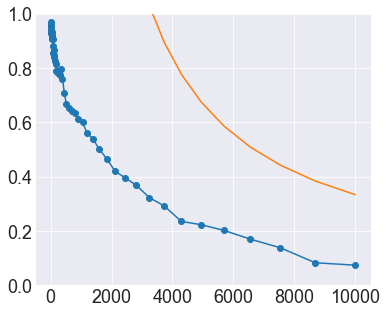

In [82]:
plt.figure(figsize=(6,5));
plt.plot(ns,ps_eps001,'-o')
plt.plot(ns, u.var()/(ns*0.01**2))
plt.ylim(0,1)



**Central Limit Theorem.**  Although the Weak Law of Large Numbers tells us
that the distribution of $\overline{X}_n$ becomes concentrated around $\mu$, it
does not tell us what that distribution is. The Central Limit Theorem (CLT)
says that $\overline{X}_n$ has a distribution that is approximately Normal
with mean $\mu$ and variance $\sigma^2/n$. Amazingly, nothing is assumed
about the distribution of $X_i$, except the existence
of the mean and variance. The following is the Central Limit Theorem:
Let $\lbrace X_1,X_2,\ldots,X_n \rbrace$ be iid with mean $\mu$ and
variance $\sigma^2$. Then,

$$
Z_n = \frac{\sqrt{n}(\overline{X}_n-\mu)}{\sigma} \overset{P}{\longrightarrow} Z\sim\mathcal{N}(0,1)
$$

 The loose interpretation of the Central Limit Theorem is that
$\overline{X}_n$ can be legitimately approximated by a Normal distribution.
Because we are talking about convergence in probability here, claims
about probability are legitimized, not claims about the random variable
itself. Intuitively, this shows that normality arises from sums of small,
independent disturbances of finite variance. Technically, the finite
variance assumption is essential for normality. Although the Central Limit
Theorem provides a powerful, general approximation, the quality of the
approximation for a particular situation still depends on the original
(usually unknown) distribution.

In [83]:
def sum_rva(n, va, ensemble=10000):
    return np.asarray([(np.sum(va.rvs(size=n))-n*va.mean())/(np.sqrt(n)*va.std()) for _ in range(ensemble)])

In [84]:
u = stats.uniform(1,2)

In [85]:
gauss = stats.norm(loc=0,scale=1)

In [86]:
sum_rva(1,u)

array([-0.58040987,  0.23718871,  0.08633395, ...,  1.50390024,
       -0.56474434, -0.94895071])

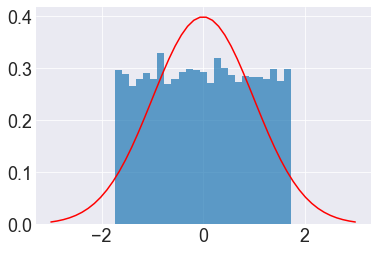

In [87]:
plt.hist(sum_rva(1,u),bins=25,density=True,alpha=0.7); #https://en.wikipedia.org/wiki/Histogram#Number_of_bins_and_width
plt.plot(np.linspace(-3,3),gauss.pdf(np.linspace(-3,3)),color='red');

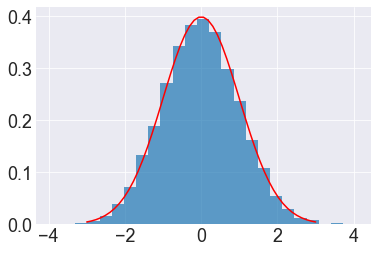

In [88]:
plt.hist(sum_rva(100,u),bins=25,density=True,alpha=0.7); #https://en.wikipedia.org/wiki/Histogram#Number_of_bins_and_width
plt.plot(np.linspace(-3,3),gauss.pdf(np.linspace(-3,3)),color='red');

In [89]:
from ipywidgets import interact, fixed, IntSlider

In [90]:
def sum_rva_fig(n, va, ensemble=10000):
    f, ax = plt.subplots(figsize=(6,5))
    ax.hist(sum_rva(n,va,ensemble),bins=25,density=True,alpha=0.7)
    ax.plot(np.linspace(-3,3),gauss.pdf(np.linspace(-3,3)),color='red');
#     return ax

In [91]:
interact(sum_rva_fig, 
         n=IntSlider(min=1,max=100,step=1,value=1), 
         va=fixed(u), 
         ensemble=fixed(1000));

interactive(children=(IntSlider(value=1, description='n', min=1), Output()), _dom_classes=('widget-interact',)…

In [92]:
u_e = stats.expon()

In [93]:
interact(sum_rva_fig, 
         n=IntSlider(min=1,max=100,step=1,value=1), 
         va=fixed(u_e), 
         ensemble=fixed(1000));

interactive(children=(IntSlider(value=1, description='n', min=1), Output()), _dom_classes=('widget-interact',)…

## Estimation Using Maximum Likelihood

The estimation problem starts with the desire to infer something meaningful
from data.  For parametric estimation, the strategy is to postulate a model for
the data and then use the data to fit model parameters.  This leads to two
fundamental questions: where to get the model and how to estimate the
parameters? The first question is best answered by the maxim: *all models are
wrong, some are useful*. In other words, choosing a model depends as much on
the application as on the model itself. Think about models as building
different telescopes to view the sky. No one would ever claim that the
telescope generates the sky! It is same with data models. Models give us
multiple perspectives on the data that themselves are proxies for some deeper
underlying phenomenon.

Some categories of data may be more commonly studied using certain types of
models, but this is usually very domain-specific and ultimately depends on the
aims of the analysis. In some cases, there may be strong physical reasons
behind choosing a model.  For example, one could postulate that the model is
linear with some noise as in the following:

$$
Y = a X + \epsilon
$$

 which basically says that you, as the experimenter, dial in some
value for $X$ and then read off something directly proportional to $X$ as the
measurement, $Y$, plus some additive noise that you attribute to jitter in the
apparatus. Then, the next step is to estimate the paramater $a$ in the model,
given some postulated claim about the nature of $\epsilon$. How to compute the
model parameters depends on the particular methodology. The two broad rubrics
are parametric and non-parametric estimation. In the former, we assume we know
the density function of the data and then try to derive the embedded parameters
for it. In the latter, we claim only to know that the density function is a
member of a broad class of density functions and then use the data
to characterize a member of that class. Broadly speaking, the former consumes
less data than the latter, because there are fewer unknowns to compute from
the data.

Let's concentrate on parametric estimation for now. The tradition is to denote
the unknown parameter to be estimated as $\theta$ which is a member of a large
space of alternates, $\Theta$. To judge between potential $\theta$ values, we
need an objective function, known as a *risk* function,
$L(\theta,\hat{\theta})$, where $\hat{\theta}(\mathbf{x})$ is an
estimate for the unknown $\theta$ that is derived from the available
data $\mathbf{x}$. The most common and useful risk function is the
squared error loss,

$$
L(\theta,\hat{\theta}) = (\theta-\hat{\theta})^2
$$

 Although neat, this is not practical because we need to know the
unknown $\theta$ to compute it. The other problem is because $\hat{\theta}$ is
a function of the observed data, it is also a random variable with its own
probability density function.  This leads to the notion of the *expected risk*
function,

$$
R(\theta,\hat{\theta}) = \mathbb{E}_\theta(L(\theta,\hat{\theta})) = \int L(\theta,\hat{\theta}(\mathbf{x})) f(\mathbf{x};\theta) d \mathbf{x}
$$

 In other words, given a fixed $\theta$, integrate over the
probability density function of the data, $f(\mathbf{x})$,  to compute the
risk. Plugging in for the squared error loss,  we compute the
mean squared error,

$$
\mathbb{E}_\hat{\theta}(\theta-\hat{\theta})^2 =\int (\theta-\hat{{\theta}})^2 f(\mathbf{x};\hat{\theta}) d \mathbf{x}
$$

 This has the important factorization into the *bias*,

$$
\texttt{bias} = \mathbb{E}_\theta(\hat{\theta})-\theta
$$

 with the corresponding variance, $\mathbb{V}_\theta(\hat{\theta})$ as
in the following *mean squared error* (MSE):

$$
\mathbb{E}_\hat{\theta}(\theta-\hat{\theta})^2= \texttt{bias}^2+\mathbb{V}_\theta(\hat{\theta})
$$

 This is an important trade-off that we will return to repeatedly. The
idea is the bias is nonzero when the estimator $\hat{\theta}$, integrated
over all possible data, $f(\mathbf{x})$, does not equal the underlying target
parameter $\theta$. In some sense, the estimator misses the target, no matter
how much data is used.  When the bias equals zero, the estimated is *unbiased*.
For fixed MSE, low bias implies high variance and vice-versa. This trade-off
was once not emphasized and instead much attention was paid to the smallest
variance of unbiased estimators (see Cramer-Rao bounds). In practice,
understanding and exploiting the trade-off between bias and variance and
reducing the MSE is more important.

With all this set up, we can now ask how bad can bad get by
examining *minimax* risk,

$$
R_{\texttt{mmx}} = \inf_{\hat{\theta}} \sup_\theta R(\theta,\hat{\theta})
$$

 where the $\inf$ is take over all estimators.  Intuitively, this
means if we found the worst possible $\theta$ and swept over all possible
parameter estimators $\hat{\theta}$, and then took the smallest possible risk
we could find, we would have the minimax risk. Thus, an estimator,
$\hat{\theta}_{\texttt{mmx}}$, is a *minimax estimator* if it achieves this
feat,

$$
\sup_\theta R(\theta,\hat{\theta}_{\texttt{mmx}}) =\inf_{\hat{\theta}} \sup_\theta R(\theta,\hat{\theta})
$$

 In other words, even in the face of the worst $\theta$ (i.e., the
$\sup_\theta$), $\hat{\theta}_{\texttt{mmx}}$ still achieves the minimax
risk. There is a greater theory that revolves around minimax estimators of
various kinds, but this is far beyond our scope here. The main thing to focus
on is that under certain technical but easily satisfiable conditions, the
maximum likelihood estimator is approximately minimax. Maximum likelihood is
the subject of the next section.  Let's get started with the simplest
application: coin-flipping.

## Setting up the Coin Flipping Experiment

Suppose we have coin and want to estimate the probability of heads ($p$) for
it. We model the distribution of heads and tails as a Bernoulli distribution
with the following probability mass function:

$$
\phi(x)= p^x (1-p)^{(1-x)}
$$

 where $x$ is the outcome, *1* for heads and *0* for tails. Note that
maximum likelihood is a parametric method that requires the specification of a
particular model for which we will compute embedded parameters. For $n$
independent flips, we have the joint density as the product of $n$ of
these functions as in,

$$
\phi(\mathbf{x})=\prod_{i=1}^n p^x_i (1-p)^{(1-x_i)}
$$

 The following is the *likelihood function*,

$$
\mathcal{L}(p ; \mathbf{x})= \prod_{i=1}^n p^{ x_i }(1-p)^{1-x_i}
$$

 This is basically notation. We have just renamed the
previous equation to emphasize the $p$ parameter, which is what
we want to estimate.

The principle of *maximum likelihood* is to maximize the likelihood as the
function of $p$ after plugging in all of the $x_i$ data. We then call this
maximizer $\hat{p}$ which is a function of the observed $x_i$ data, and as
such, is a random variable with its own distribution. This method therefore
ingests data and an assumed model for the probability density, and produces a
function that estimates the embedded parameter in the assumed probability
density.  Thus, maximum likelihood generates the *functions* of data that we
need in order to get at the underlying parameters of the model. Note that there
is no limit to the ways we can functionally manipulate the data we have
collected. The maximum likelihood principle gives us a systematic method for
constructing these functions subject to the assumed model. This is a point
worth emphasizing: the maximum likelihood principle yields functions as
solutions the same way solving differential equations yields functions as
solutions. It is very, very much harder to produce a function than to produce a
value as a solution, even with the assumption of a convenient probability
density.  Thus, the power of the principle is that you can construct such
functions subject to the model assumptions.

### Simulating the Experiment

We need the following code to simulate coin flipping.

In [4]:
from scipy.stats import bernoulli 
p_true=1/2.0         # estimate this!
fp=bernoulli(p_true) # create bernoulli random variate
xs = fp.rvs(100)     # generate some samples
print xs[:30]        # see first 30 samples

[0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1]


 Now, we can write out the likelihood function using Sympy.  Note
that we give the Sympy variables the `positive=True` attribute upon
construction because this eases Sympy's internal simplification algorithms.

In [5]:
import sympy
x,p,z=sympy.symbols('x p z', positive=True)
phi=p**x*(1-p)**(1-x) # distribution function
L=np.prod([phi.subs(x,i) for i in xs]) # likelihood function 
print L # approx 0.5?

p**57*(-p + 1)**43


 Note that, once we plug in the data, the likelihood function is
solely a function of the unknown parameter ($p$ in this case).  The following
code uses calculus to find the extrema of the likelihood function.  Note that
taking the `log` of $L$ makes the maximization problem tractable but doesn't
change the extrema.

In [6]:
logL=sympy.expand_log(sympy.log(L))
sol,=sympy.solve(sympy.diff(logL,p),p)
print sol

57/100


**Programming Tip.**

Note that `sol,=sympy.solve` statement includes
a comma after the `sol` variable. This is because the `solve`
function returns a list containing a single element. Using
this assignment unpacks that single element into the `sol` variable
directly. This is another one of the many small elegancies of Python.

 

The following code generates [Figure](#fig:Maximum_likelihood_10_2).

d:\Miniconda64\Lib\site-packages\numpy\__init__.py:1: RuntimeWarning: divide by zero encountered in log
  """


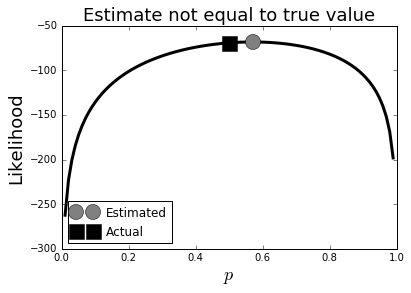

In [7]:

fig,ax=subplots()
x=np.linspace(0,1,100)
ax.plot(x,map(sympy.lambdify(p,logL,'numpy'),x),'k-',lw=3)
ax.plot(sol,logL.subs(p,sol),'o',
        color='gray',ms=15,label='Estimated')
ax.plot(p_true,logL.subs(p,p_true),'s',
        color='k',ms=15,label='Actual')
ax.set_xlabel('$p$',fontsize=18)
ax.set_ylabel('Likelihood',fontsize=18)
ax.set_title('Estimate not equal to true value',fontsize=18)
ax.legend(loc=0)

**Programming Tip.**

In the prior code, we use the `lambdify` function in `lambdify(p,logL,'numpy')` to
take a Sympy expression and convert it into a Numpy version that is easier to
compute.  The `lambdify` function has an extra argument where you can specify
the function space that it should use to convert the expression. In the above
this is set to Numpy.



<!-- dom:FIGURE: [fig-statistics/Maximum_likelihood_10_2.png, width=500 frac=0.75] Maximum likelihood estimate vs. true parameter. Note that the estimate is slightly off from the true value. This is a consequence of the fact that the estimator is a function of the data and lacks knowledge of the true underlying value.  <div id="fig:Maximum_likelihood_10_2"></div> -->
<!-- begin figure -->
<div id="fig:Maximum_likelihood_10_2"></div>

<p>Maximum likelihood estimate vs. true parameter. Note that the estimate is slightly off from the true value. This is a consequence of the fact that the estimator is a function of the data and lacks knowledge of the true underlying value.</p>
<img src="fig-statistics/Maximum_likelihood_10_2.png" width=500>

<!-- end figure -->


[Figure](#fig:Maximum_likelihood_10_2) shows  that our estimator $\hat{p}$
(circle) is not equal to the true value of $p$ (square), despite being
the maximum of the likelihood function. This may sound disturbing, but keep in
mind this estimate is a function of the random data; and since that data can
change, the ultimate estimate can likewise change. I invite you to run this
code in the corresponding IPython notebook a few times to observe this.
Remember that the estimator is a *function* of the data and is thus also a
*random variable*, just like the data is. This means it has its own probability
distribution with corresponding mean and variance. So, what we are observing is
a consequence of that variance.

<!-- !bc pycod -->
<!-- def estimator_gen(niter=10,ns=100): -->
<!-- 'generate data to estimate distribution of maximum likelihood estimator' -->
<!-- out=[] -->
<!-- # make sympy variable real-valued -->
<!-- x=sympy.symbols('x',real=True) -->
<!-- # likelihood function -->
<!-- L= p**x*(1-p)**(1-x) -->
<!-- for i in range(niter): -->
<!-- # generate some samples from the experiment -->
<!-- xs = sample(ns) -->
<!-- # objective function to maximize -->
<!-- J=np.prod([L.subs(x,i) for i in xs]) -->
<!-- # log is easier to work with -->
<!-- logL=sympy.expand_log(sympy.log(J)) -->
<!-- # use basic calculus to find extrema -->
<!-- sol=sympy.solve(sympy.diff(logL,p),p)[0] -->
<!-- # convert output to numeric float from sympy -->
<!-- out.append(float(sol.evalf())) -->
<!-- # return scalar if list contains only 1 term -->
<!-- return out if len(out)>1 else out[0] -->
<!-- !ec -->

<!-- dom:FIGURE: [fig-statistics/Maximum_likelihood_30_2.png, width=500 frac=0.85] Histogram of maximum likelihood estimates. The title shows the estimated mean and standard deviation of the samples. <div id="fig:Maximum_likelihood_30_2"></div>  -->
<!-- begin figure -->
<div id="fig:Maximum_likelihood_30_2"></div>

<p>Histogram of maximum likelihood estimates. The title shows the estimated mean and standard deviation of the samples.</p>
<img src="fig-statistics/Maximum_likelihood_30_2.png" width=500>

<!-- end figure -->


[Figure](#fig:Maximum_likelihood_30_2) shows what happens when you run many
thousands of coin experiments and compute the maximum likelihood
estimate for each experiment, given a particular number of samples 
per experiment. This simulation gives us a histogram of the maximum likelihood
estimates, which is an approximation of the probability distribution of the
$\hat{p}$ estimator itself.  This figure shows that the sample mean
of the estimator ($\mu = \frac{1}{n}\sum \hat{p}_i$) is pretty close to the
true value, but looks can be deceiving. The only way to know for sure is to
check if the estimator is unbiased, namely, if

$$
\mathbb{E}(\hat{p}) = p
$$

 Because this problem is simple, we can solve for this in general
noting that the terms above are either $p$, if $x_i=1$ or $1-p$ if $x_i=0$.
This means that we can write

$$
\mathcal{L}(p\vert \mathbf{x})= p^{\sum_{i=1}^n x_i}(1-p)^{n-\sum_{i=1}^n x_i}
$$

 with corresponding logarithm as

$$
J=\log(\mathcal{L}(p\vert \mathbf{x})) =  \log(p)  \sum_{i=1}^n x_i +   \log(1-p) \left(n-\sum_{i=1}^n x_i\right)
$$

 Taking the derivative of this gives:

$$
\frac{dJ}{dp} = \frac{1}{p}\sum_{i=1}^n x_i + \frac{(n-\sum_{i=1}^n x_i)}{p-1}
$$

 and solving this for $p$ leads to

$$
\hat{p} = \frac{1}{ n} \sum_{i=1}^n x_i
$$

This is our *estimator* for $p$. Up until now, we have been using Sympy to
solve for this based on the data $x_i$ but now that we have it analytically we
don't have to solve for it each time. To check if this estimator is biased, we
compute its expectation:

$$
\mathbb{E}\left(\hat{p}\right) =\frac{1}{n}\sum_i^n \mathbb{E}(x_i) = \frac{1}{n} n \mathbb{E}(x_i)
$$

 by linearity of the expectation and where

$$
\mathbb{E}(x_i)  = p
$$

 Therefore,

$$
\mathbb{E}\left(\hat{p}\right) =p
$$

 This means that the estimator is *unbiased*. Similarly,

$$
\mathbb{E}\left(\hat{p}^2\right) = \frac{1}{n^2} \mathbb{E}\left[\left(  \sum_{i=1}^n x_i \right)^2 \right]
$$

 and where

$$
\mathbb{E}\left(x_i^2\right) =p
$$

 and by the independence assumption,

$$
\mathbb{E}\left(x_i x_j\right) =\mathbb{E}(x_i)\mathbb{E}(x_j) =p^2
$$

 Thus,

$$
\mathbb{E}\left(\hat{p}^2\right) =\left(\frac{1}{n^2}\right) n \left[ p+(n-1)p^2 \right]
$$

 So, the variance of the estimator, $\hat{p}$, is the following:

$$
\mathbb{V}(\hat{p}) = \mathbb{E}\left(\hat{p}^2\right)- \mathbb{E}\left(\hat{p}\right)^2  = \frac{p(1-p)}{n}
$$

 Note that the $n$ in the denominator means that the variance
asymptotically goes to zero as $n$ increases (i.e., we consider more and
more samples). This is good news because it means that more and
more coin flips lead to a better estimate of the underlying $p$.

Unfortunately, this formula for the variance is practically useless because we
need $p$ to compute it and $p$ is the parameter we are trying to estimate in
the first place! However, this is where the *plug-in* principle [^invariance-property] 
saves the day.  It turns out in this situation, you can
simply substitute the maximum likelihood estimator, $\hat{p}$, for the $p$ in
the above equation to obtain the asymptotic variance for $\mathbb{V}(\hat{p})$.
The fact that this works is guaranteed by the asymptotic theory of maximum
likelihood estimators.

[^invariance-property]: This is also known as the *invariance property*
of maximum likelihood estimators. It basically states that the 
maximum likelihood estimator of any function, say, $h(\theta)$, is
the same $h$ with the maximum likelihood estimator for $\theta$ substituted
in for $\theta$; namely, $h(\theta_{ML})$.

Nevertheless, looking at $\mathbb{V}(\hat{p})^2$, we can immediately notice
that if $p=0$, then there is no estimator variance because the outcomes are
guaranteed to be tails. Also, for any $n$,  the maximum of this variance
happens at $p=1/2$. This is our worst case scenario and the only way to
compensate is with larger $n$.

All we have computed is the mean and variance of the estimator. In general,
this is insufficient to characterize the underlying probability density of
$\hat{p}$, except if we somehow knew that $\hat{p}$ were normally distributed.
This is where the powerful *Central Limit Theorem* we discussed in the section ref{ch:stats:sec:limit} comes in. The form of the estimator, which is just a
sample mean, implies that we can apply this theorem and conclude that $\hat{p}$
is asymptotically normally distributed. However, it doesn't quantify how many
samples $n$ we need. In our simulation this is no problem because we can
generate as much data as we like, but in the real world, with a costly
experiment, each sample may be precious [^edgeworth].  

[^edgeworth]: It turns out that the central limit theorem augmented with an
Edgeworth expansion tells us that convergence is regulated by the skewness
of the distribution [[feller1950introduction]](#feller1950introduction). In other words, the 
more symmetric the distribution, the faster it converges to the normal
distribution according to the central limit theorem.

In the following, we won't apply the Central Limit Theorem and instead proceed
analytically.

### Probability Density for the Estimator

To write out the full density for $\hat{p}$, we first have to ask what is
the probability that the estimator will equal a specific value and the tally up
all the ways that could happen with their corresponding probabilities. For
example, what is the probability that

$$
\hat{p} = \frac{1}{n}\sum_{i=1}^n x_i  = 0
$$

  This can only happen one way: when $x_i=0 \hspace{0.5em} \forall i$. The
probability of this happening can be computed from the density

$$
f(\mathbf{x},p)= \prod_{i=1}^n \left(p^{x_i} (1-p)^{1-x_i}  \right)
$$

$$
f\left(\sum_{i=1}^n x_i  = 0,p\right)= \left(1-p\right)^n
$$

 Likewise, if $\lbrace x_i \rbrace$ has only one nonzero element, then

$$
f\left(\sum_{i=1}^n x_i  = 1,p\right)= n p \prod_{i=1}^{n-1} \left(1-p\right)
$$

 where the $n$ comes from the $n$ ways to pick one element
from the $n$ elements $x_i$. Continuing this way, we can construct the
entire density as

$$
f\left(\sum_{i=1}^n x_i  = k,p\right)= \binom{n}{k} p^k  (1-p)^{n-k}
$$

 where the first term on the right is the binomial coefficient of $n$ things
taken $k$ at a time. This is the binomial distribution and it's not the
density for $\hat{p}$, but rather for $n\hat{p}$. We'll leave this as-is
because it's easier to work with below. We just have to remember to keep
track of the $n$ factor.

**Confidence Intervals**

Now that we have the full density for $\hat{p}$, we are ready to ask some
meaningful questions. For example, what is the probability  the estimator is within
$\epsilon$ fraction of the true value of $p$?

$$
\mathbb{P}\left( \vert  \hat{p}-p \vert  \le \epsilon p \right)
$$

 More concretely, we want to know how often the
estimated $\hat{p}$ is trapped within $\epsilon$ of the actual value.  That is,
suppose we ran the experiment 1000 times to generate 1000 different estimates
of $\hat{p}$. What percentage of the 1000 so-computed values are trapped within
$\epsilon$ of the underlying value.  Rewriting the above equation as the
following,

$$
\mathbb{P}\left(p-\epsilon p < \hat{p} < p + \epsilon p \right) = \mathbb{P}\left(  n p - n \epsilon p < \sum_{i=1}^n x_i < n p + n \epsilon p \right)
$$

 Let's plug in some live numbers here for our worst case
scenario (i.e., highest variance scenario) where $p=1/2$. Then, if
$\epsilon = 1/100$, we have

$$
\mathbb{P}\left( \frac{99 n}{200} < \sum_{i=1}^n x_i   < \frac{101 n}{200} \right)
$$

 Since the sum in integer-valued, we need $n> 100$ to even compute this.
Thus, if $n=101$ we have,

$$
\begin{eqnarray*}
\mathbb{P}\left(\frac{9999}{200} < \sum_{i=1}^{101} x_i < \frac{10201}{200} \right) = f\left(\sum_{i=1}^{101} x_i = 50,p\right) &  \ldots \\\
= \binom{101}{50} (1/2)^{50}  (1-1/2)^{101-50} & = & 0.079
\end{eqnarray*}
$$

 This means that in the worst-case scenario for $p=1/2$, given $n=101$
trials, we will only get within 1\% of the actual $p=1/2$ about 8\% of the
time. If you feel disappointed, that only means you've been paying attention.
What if the coin was really heavy and it was hard work to repeat this 101 times?

Let's come at this another way: given I could only flip the coin 100
times, how close could I come to the true underlying value with high
probability (say, 95\%)? In this case, instead of picking a value for
$\epsilon$, we are solving for $\epsilon$. Plugging in gives,

$$
\mathbb{P}\left(50 - 50\epsilon < \sum_{i=1}^{100} x_i < 50 + 50 \epsilon  \right) = 0.95
$$

 which we have to solve for $\epsilon$. Fortunately, all the tools we
need to solve for this are already in Scipy.

In [94]:
b = stats.binom(100, 0.5)

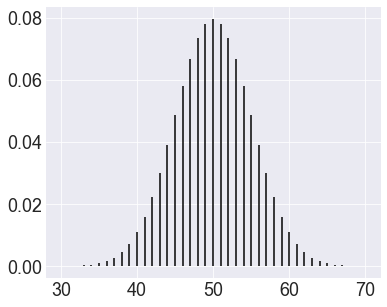

In [95]:
plt.figure(figsize=(6,5))
plt.vlines(np.arange(30,71),np.zeros(40),b.pmf(np.arange(30,71)))

In [96]:
def soma(i):
    return np.sum(b.pmf(np.arange(-i,i)+50))

In [98]:
soma(2)

0.3091735760040373

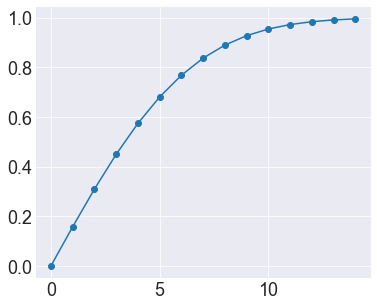

In [25]:
plt.figure(figsize=(6,5))
plt.plot(np.arange(15),np.asarray([soma(i) for i in range(15)]), '-o')

In [27]:
soma(9),soma(10),soma(11)

(0.9272429931224488, 0.9539559330706295, 0.9719105320521932)

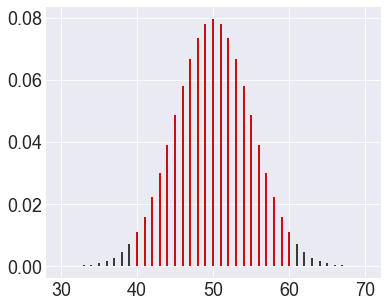

In [33]:
plt.figure(figsize=(6,5))
plt.vlines(np.arange(30,71),np.zeros(40),b.pmf(np.arange(30,71)))
plt.vlines(np.arange(50-10,50+10+1),np.zeros(10),b.pmf(np.arange(50-10,50+10+1)),colors='red')

<!-- dom:FIGURE: [fig-statistics/Maximum_likelihood_20_2.png, width=500 frac=0.85] Probability mass function for $\hat{p}$. The two vertical lines form the confidence interval. <div id="fig:Maximum_likelihood_20_2"></div> -->
<!-- begin figure -->
<div id="fig:Maximum_likelihood_20_2"></div>

<p>Probability mass function for $\hat{p}$. The two vertical lines form the confidence interval.</p>
<img src="fig-statistics/Maximum_likelihood_20_2.png" width=500>

<!-- end figure -->


 The two vertical lines in the plot show how far out from the mean we
have to go to accumulate 95\% of the probability. Now, we can solve this as

$$
50+50\epsilon=60\\
\epsilon = 1/5
$$

 which makes $\epsilon=1/5$ or 20\%. So, flipping 100 times means I can
only get within 20\% of the real $p$ 95\% of the time in the worst case
scenario (i.e., $p=1/2$). In other words this a 95\% chance the we estimate $\hat{p}$ between $0.4$ and $0.6$ in 100 trials when the actual $p=1/2$.


The following code verifies the situation.

In [37]:
bern = stats.bernoulli(0.5)

In [38]:
bern.rvs(size=4)

array([1, 0, 1, 1])

In [87]:
phat_list = np.asarray([np.mean(bern.rvs(size=100)) for _ in range(1000)])

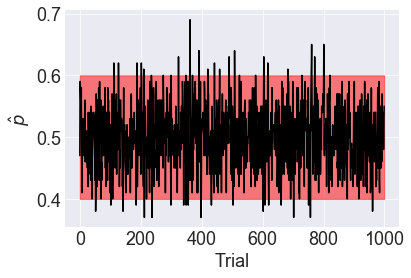

In [88]:
plt.plot(phat_list,color='k',alpha=1)
plt.fill_between(np.arange(1000),[0.4]*1000, [0.6]*1000, alpha=0.5, color='red')
plt.xlabel('Trial')
plt.ylabel(r'$\hat{p}$');

In [89]:
np.mean(np.abs(phat_list-0.5)<0.5/5)

0.959

 Well, that seems to work! Now we have a way to get at the quality of
the estimator, $\hat{p}$.

**Maximum Likelihood Estimator Without Calculus**

The prior example showed how we can use calculus to compute the maximum
likelihood estimator. It's important to emphasize that the maximum likelihood
principle does *not* depend on calculus and extends to more general situations
where calculus is impossible. For example, let $X$ be uniformly distributed in
the interval $[0,\theta]$.  Given $n$ measurements of $X$, the likelihood
function is the following:

$$
L(\theta) = \prod_{i=1}^n \frac{1}{\theta} = \frac{1}{\theta^n}
$$

 where each $x_i \in [0,\theta]$. Note that the slope of this function
is not zero anywhere so the usual calculus approach is not going to work here.
Because the likelihood is the product of the individual uniform densities, if
any of the $x_i$ values were outside of the proposed $[0,\theta]$ interval,
then the likelihood would go to zero, because the uniform density is zero
outside of the $[0,\theta]$. Naturally, this is no good for maximization. Thus,
observing that the likelihood function is strictly decreasing with increasing
$\theta$, we conclude that the value for $\theta$ that maximizes the likelihood
is the maximum of the $x_i$ values. To summarize, the maximum likelihood
estimator is the following:

$$
\theta_{ML} = \max_i x_i
$$

 As always, we want the distribution of this estimator to judge its
performance. In this case, this is pretty straightforward. The cumulative
density function for the $\max$ function is the following:

$$
\mathbb{P} \left( \hat{\theta}_{ML} < v \right) =  \mathbb{P}( x_0 \leq v \wedge x_1 \leq v \ldots \wedge x_n \leq v)
$$

 and since all the $x_i$ are uniformly distributed in $[0,\theta]$, we have

$$
\mathbb{P} \left( \hat{\theta}_{ML} < v  \right) =  \left(\frac{v}{\theta}\right)^n
$$

 So, the probability density function is then,

$$
f_{\hat{\theta}_{ML}}(\theta_{ML}) =  n \theta_{ML}^{ n-1 } \theta^{ -n }
$$

 Then, we can compute the $\mathbb{E}(\theta_{ML}) = (\theta n)/(n+1)$ with
corresponding variance as $\mathbb{V}(\theta_{ML}) = \frac{\theta^2 n}{(n+1)^2 (n+2)}$.

For a quick sanity check, we can write the following simulation for $\theta =1$
as in the following:

In [99]:
theta = 1
unif = stats.uniform(0,theta)

In [101]:
unif.rvs((10,2)).max(0)

array([0.82122193, 0.88959886])

In [109]:
n=100
replicas=10000
ensemble = unif.rvs((n,replicas)).max(axis=0)

In [107]:
np.mean(ensemble), theta*n/(n+1)

(0.9944242403386422, 0.9900990099009901)

In [110]:
np.var(ensemble), (theta**2)*n/(((n+1)**2)*(n+2))

(9.64228087462772e-05, 9.610745582420793e-05)

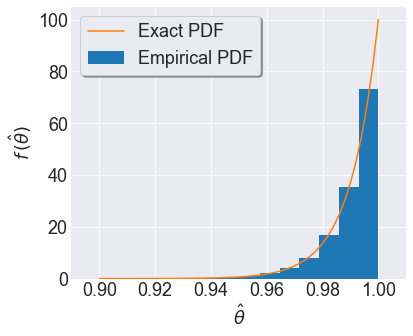

In [131]:
theta_hat = np.linspace(0.9,1)

plt.figure(figsize=(6,5))

plt.hist(ensemble,density=True,label="Empirical PDF")
plt.plot(theta_hat,n*(theta_hat)**(n-1)*theta**(-n),label="Exact PDF")

plt.xlim(0.89,1.01)
plt.xlabel(r"$\hat{\theta}$")
plt.ylabel(r"$f\, (\hat{\theta})$")

plt.legend(frameon=True,fancybox=True,shadow=True);

In [ ]:
stats.uniform.fit()

In [111]:
data_for_test = unif.rvs(1000)
stats.uniform.fit(data_for_test)

(0.0014744549920679972, 0.9976118964375433)

**Programming Tip.**

The `max(0)` suffix on for the `mle` computation takes
the maximum of the so-computed array along the column (`axis=0`)
dimension.



 You can also plot `hist(mle)` to see the histogram of the simulated
maximum likelihood estimates and match it up against the probability density
function we derived above.  


In this section, we explored the concept of maximum
likelihood estimation using a coin flipping experiment both analytically and
numerically with the scientific Python stack. We also explored the case when
calculus is not workable for maximum likelihood estimation.  There are two key
points to remember. First, maximum likelihood estimation produces a function of
the data that is itself a random variable, with its own probability
distribution. We can get at the quality of the so-derived estimators by
examining the confidence intervals around the estimated values using the
probability distributions associated with the estimators themselves.  
Second, maximum likelihood estimation applies even in situations 
where using basic calculus is not applicable [[wasserman2004all]](#wasserman2004all).


## Delta Method
<div id="sec:delta_method"></div>

The Central Limit Theorem provides a way to get at the distribution of a random
variable. However, sometimes we are more interested in a function of the random
variable. In order to extend and generalize the central limit theorem in this
way, we need the Taylor series expansion. Recall that the Taylor series
expansion is an approximation of a function of the following form,

$$
T_r(x) =\sum_{i=0}^r \frac{g^{(i)}(a)}{i!}(x-a)^i
$$

 this basically says that a function $g$ can be adequately
approximated about a point $a$ using a polynomial based on its derivatives
evaluated at $a$. Before we state the general theorem, let's examine
an example to understand how the mechanics work.

**Example.**  Suppose that $X$ is a random variable with
$\mathbb{E}(X)=\mu\neq 0$.  Furthermore, supposedly have a suitable
function $g$ and we want the distribution of $g(X)$. Applying the
Taylor series expansion, we obtain the following,

$$
g(X) \approx g(\mu)+ g^{\prime}(\mu)(X-\mu)
$$

 If we use $g(X)$  as an estimator for $g(\mu)$, then we can say that
we approximately have the following

$$
\begin{align*}
\mathbb{E}(g(X)) &=g(\mu) \\\
\mathbb{V}(g(X)) &=(g^{\prime}(\mu))^2 \mathbb{V}(X) \\\
\end{align*}
$$

 Concretely, suppose we want to estimate the odds, $\frac{p}{1-p}$.
For example, if $p=2/3$, then we say that the odds is `2:1` meaning that the
odds of the one outcome are twice as likely as the odds of the other outcome.
Thus, we have $g(p)=\frac{p}{1-p}$ and we want to find
$\mathbb{V}(g(\hat{p}))$.  In our coin-flipping problem, we have the
estimator $\hat{p}=\frac{1}{n}\sum X_k$ from the Bernoulli-distributed data
$X_k$ individual coin-flips. Thus,

$$
\begin{align*}
\mathbb{E}(\hat{p}) &= p  \\\
\mathbb{V}(\hat{p}) &= \frac{p(1-p)}{n}  \\\
\end{align*}
$$

  Now, $g^\prime(p)=1/(1-p)^2$, so we have,

$$
\begin{align*}
\mathbb{V}(g(\hat{p}))&=(g^\prime(p))^2 \mathbb{V}(\hat{p}) \\\
                      &=\left(\frac{1}{(1-p)^2}\right)^2 \frac{p(1-p)}{n}  \\\
                      &= \frac{p}{n(1-p)^3}  \\\
\end{align*}
$$

 which is an approximation of the variance of the estimator
$g(\hat{p})$. Let's simulate this and see how it agrees.

In [113]:
p = 0.1
n = 10
replicas = 5000
bern = stats.bernoulli(p)
phat = bern.rvs((n,replicas)).mean(axis=0)
phat = phat[~np.isclose(phat,1)]

In [114]:
np.mean(phat/(1-phat)), np.var(phat/(1-phat))

(0.12289682539682542, 0.017214101473922903)

In [115]:
p/(1-p), p/(n*(1-p)**3)

(0.11111111111111112, 0.013717421124828532)

Let's try this again with a probability of heads of `0.5`

In [116]:
p = 0.5
n = 10
replicas = 5000
bern = stats.bernoulli(p)
phat = bern.rvs((n,replicas)).mean(axis=0)
phat = phat[~np.isclose(phat,1)]

np.mean(phat/(1-phat)), np.var(phat/(1-phat))

(1.291227602151972, 1.308795955752311)

In [117]:
p/(1-p), p/(n*(1-p)**3)

(1.0, 0.4)

 The odds ratio is this case is equal to one, which
is not close to what was reported. According to our
approximation, we have $\mathbb{V}(g)=0.4$, which does not
look like what our simulation just reported.  This is
because the approximation is best when the odds ratio is
nearly linear and worse otherwise.

<!-- dom:FIGURE: [fig-statistics/Maximum_likelihood_0001.png, width=500 frac=0.85] The odds ratio is close to linear for small values but becomes unbounded as $p$ approaches one. The delta method is more effective for small underlying values of $p$, where the linear approximation is better. <div id="fig:Maximum_likelihood_0001"></div> -->
<!-- begin figure -->
<div id="fig:Maximum_likelihood_0001"></div>

<p>The odds ratio is close to linear for small values but becomes unbounded as $p$ approaches one. The delta method is more effective for small underlying values of $p$, where the linear approximation is better.</p>
<img src="fig-statistics/Maximum_likelihood_0001.png" width=500>

<!-- end figure -->